# Cogs 108 - Final Project:  Snapchat Political Ads


## Overview

For this project, we found a dataset that provides information of the different sorts of Ads that are being produced through snapchat, and we wanted to analyze different aspects of the ads to see which would help determine it's reach

## Names
- Austin Le
- Justin Kang
- Sravya Voleti
- Zahra Masood

## Research Question
The data we are using in our project are Snapchat political ads. We are trying to determine what the answers to two questions: 
- 1) What are the characteristics of ads with a large reach (many views)? 
- 2) What are the characteristics of ads with a small reach (less views)? Also, if an ad does have a small reach, why would that be pragmatic in some cases, i.e., why would political candidates want to only reach out to a targeted few people?


## Background and Prior Work
In an age of heightened media choice and technology use, digital advertising and political communication has become increasingly popular and mainstream. Tech platforms have made it easy for businesses to advertise as they have lowered the costs of doing so. Specifically, social Media platforms including Snapchat are powerful as they allow third parties to advertise their businesses. Snapchat in particular has become an increasingly popular platform as it generally targets a younger demographic of users and allows advertisers to target highly specific groups of people. In terms of political ads, Snapchat deliberately creates a platform for parties to display political ads as they want the audience to engage with the political conversation and become more informed voters. In order to prevent misinformation and unlike other popular social media platforms, Snapchat has a full team dedicated to fact checking all political advertising (1). Because of the breadth and volume of the data regarding Snapchat political ads available, it becomes relatively easier to analyze the access data and come to meaningful and insightful conclusions (2). Given the data available, there has been some considerable research already conducted regarding this topic. For example, companies have been able to identify and isolate which are the top demographics in terms of age and gender, and have been able to target ads respectively (3). Further analyzing this data provides insight into whether or not ads that appear to be non-partisan are targeted to a certain community, and more. 


References (include links):
- 1) https://www.cnbc.com/2019/11/18/snapchat-fact-checks-political-ads-unlike-facebook-ceo-evan-spiegel.html
- 2) https://www.ft.com/content/ad6d1b3c-17ad-11ea-8d73-6303645ac406
- 3) https://blog.hootsuite.com/snapchat-demographics/

## Hypothesis 
Our hypothesis for our first question is that ads that have a large reach would generally be more expensive because they need to reach as many people as possible. Also ads with a large reach would also generally be advertised for longer in order to ensure that as many people as possible have a chance to see it. The demographics targeted by a large-reach ad would be diverse. This is because in order to have a large reach, the ad would need to target many different demographics in order to not leave anyone out.

Our hypothesis for our second question would be almost the opposite as our hypothesis from the first question. For example, an ad with a small reach would need to be targeted towards a very specific group of people which would mean that the demographic category would be very narrow. Also, a small reach ad would be much less expensive to put on since it does not need to be everywhere, only places that the certain targeted demographic would happen to see it the most. Also, a small reach would be pragmatic, we believe, because sometimes it is easier for politicians to distribute an ad that would please one group because the ad would be specific to that one group. It is hard to appeal to many people at a time because everybody is different and has different interests and beliefs. That’s why by having a small reach, you ensure that whatever group you’re reaching, they will respond to the ad positively. 


## Dataset(s)
Fill in your dataset information here
(Copy this information for each dataset)

- Dataset Name: Snap Political Ads Library
- Link to the dataset: 
    - 1) https://www.snap.com/en-US/political-ads/
    - 2) https://storage.googleapis.com/ad-manager-political-ads-dump/political/2018/PoliticalAds.zip
    - 3) https://storage.googleapis.com/ad-manager-political-ads-dump/political/2019/PoliticalAds.zip
    - 4) https://storage.googleapis.com/ad-manager-political-ads-dump/political/2020/PoliticalAds.zip
- Number of observations: 5468 total observations(rows)

From the first website given above, the dataset consists of an ad, as well as some of their characteristics that would be helpful in determing their "target" audience. We are using the same dataset, but there are 3 separate one based on years; in order to combine these datasets, we added a new column that would indicate the year that each row was tied too.

## Setup

In [2]:
pip install plotly==4.5.4

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('ggplot')

import plotly.graph_objects as go

In [4]:
pa18 = pd.read_csv('PoliticalAds18.csv')
pa19 = pd.read_csv('PoliticalAds19.csv')
pa20 = pd.read_csv('PoliticalAds20.csv')

pa18['Year'] = 2018
pa19['Year'] = 2019
pa20['Year'] = 2020
ads = pd.concat([pa18,pa19,pa20], ignore_index=True)

In [5]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5468 entries, 0 to 5467
Data columns (total 35 columns):
ADID                              5468 non-null object
CreativeUrl                       5468 non-null object
Currency Code                     5468 non-null object
Spend                             5468 non-null int64
Impressions                       5468 non-null int64
StartDate                         5468 non-null object
EndDate                           4369 non-null object
OrganizationName                  5468 non-null object
BillingAddress                    5468 non-null object
CandidateBallotInformation        941 non-null object
PayingAdvertiserName              5468 non-null object
Gender                            485 non-null object
AgeBracket                        5017 non-null object
CountryCode                       5468 non-null object
Regions (Included)                1619 non-null object
Regions (Excluded)                134 non-null object
Electoral District

## Data Cleaning
The data that we had was not very clean at all. You can see this by the many null values in a lot of the columns.
The website stated for these specific columns, if there were any nulls it would mean that they were targeting everybody, not a specific group. Therefore, we decided to handle this problem by imputing null values with values that we believed made the most sense for the particular column. For example, we imputed the nulls in the 'Age Bracket' column with the string value 'All Ages' because that is what the nulls were meant for. 
Another way we cleaned our data in order to get it into a usable format is we converted some of the columns' datatypes into a type that made sense. For example, we converted the 'StartTime' and 'EndTime' columns into a DateTime object so they would be easier for us to handle given the values that were in it. 

Also, since we were trying to test the duration that the ad was displayed against the number of impressions, we created a new column called 'Duration' which was calculated using the difference between the 'EndTime' and 'StartTime' columns. 

Lastly, since we are only trying to look at ads based in the United States, we dropped all rows that had a 'Currency Code' that was not USD (United States Dollar). This way, when we performed our data analysis, we were only using the data that we created our hypothesis for and that was pertinent to our research. 

In [6]:
ads['Gender'] = ads['Gender'].fillna("Both")
ads['AgeBracket'] = ads['AgeBracket'].fillna('All Ages')
ads['CandidateBallotInformation'] = ads['CandidateBallotInformation'].fillna('agnostic')
# ads['RegionID'] = ads['RegionID'].fillna("all regions")
# ads['ElectoralDistrictID'] = ads['ElectoralDistrictID'].fillna("all electoral districts")
# ads['LatLongRad'] = ads['LatLongRad'].fillna(float("inf"))
# ads['MetroID'] = ads['MetroID'].fillna('all metro')
ads['Interests'] = ads['Interests'].fillna('agnostic')
ads['OsType'] = ads['OsType'].fillna("all systems")
ads['Language'] = ads['Language'].fillna('agnostic')
ads['AdvancedDemographics'] = ads['AdvancedDemographics'].fillna("agnostic")
ads['Targeting Connection Type'] = ads['Targeting Connection Type'].fillna("agnostic")
ads['Targeting Carrier (ISP)'] = ads['Targeting Carrier (ISP)'].fillna("agnostic")
# ads['Targeting Geo - Postal Code'] = ads['Targeting Geo - Postal Code'].fillna("all postal code")

ads['AgeBracket'].loc[ads['AgeBracket'] == np.inf] = 'All Ages'
###changing all 'Inf' values in AgeBracker to a string value that says "All Ages" because
###'Inf' meant that it targeted all ages and this is more descriptive

In [7]:
ads['StartDate'] = pd.to_datetime(ads['StartDate'])
ads['EndDate'] = pd.to_datetime(ads['EndDate'])
ads['Duration'] = (ads['EndDate'] - ads['StartDate']).dt.days

def dates(end, beg):
    if (end - beg).days >= 0.0:
        duration = (end - beg).days
    else:
        end.year +=1 
        duration = (end - beg).dt.days
# ads['trial'] = ads.apply(lambda x: dates(x['EndDate'], x['StartDate']), axis=1)

negVals = ads[ads['Duration'] < 0.0 ].index
ads.drop(negVals, inplace=True)

In [8]:
diff_countries = ads[ads['Currency Code'] != 'USD'].index
ads.drop(diff_countries, inplace=True)
ads.reset_index(inplace=True)

In [9]:
ads

index                                               ADID  \
0         0  ce5c53f386805f558f2282fd43f5d0e60fec13fb063794...   
1         1  ae7bd48cd4116eed1f9da9c3722ec33193be1d2b548d87...   
2         2  ce1dd27d338c9d91cae6568cc854184074d06e3ee441cb...   
3         3  a8a2068d3490286867fdecb322f4d4ccc10cbb98745800...   
4         4  e7015baabf17ad91085be6808694d8459be42947f0503b...   
5         5  6e91676050d62c9ad11648c23e26c4a3b0db6615427bb0...   
6         6  d52b74aaaafee4a18f46c61ab855cdf448e3dbf3f2f4a9...   
7         7  f402e8d3aa9112b0b8b047feb025241da8da30937fbde6...   
8         8  3a0ead6ef77c1ff26aedf48e2196ad57011227c0ea39bf...   
9         9  b3a845591b4f212316b09c1dc66c1175b3caafb0a9fa45...   
10       10  526c2973d3f6ee4264cd7106436325b023f4df54e303d3...   
11       12  60eaea297fb857ecbce03b71efede64866876f6d0a576a...   
12       15  97bd97377ed7774ca04e62d6c0c0bdb5469a79e80d559c...   
13       16  36c3bdfa1918bf492f41a59cc647f0c6034ae822622098...   
14       19  01a6ecef10ea5a26e9633af27f4dd0af0e37c2bb7cb538...   
15       20  add518edb616e0cb9bc13434328ed89e12e44fe207e08b...   
16       21  14535fea019a9b1a910a77ce1555af8bdedbb5c78fb60a...   
17       22  4ec6420d6a40e7f893ec6f0f84f86339c68a044baa3dcb...   
18       23  b22ffcea5f457073ecbd124fa066ab59abe07270fe8a38...   
19       24  b872d24f69c6bf8a00d89ba232bde8eeef27b2e09a4869...   
20       25  5e1f8c6d3a2dd4832d15cebcf03f38298fbf531b32fc8f...   
21       26  b397e5e0b970da31f6b0a376a1c18eae320b301ef0c8d8...   
22       27  b0fc03472172353bedcff997e74939ac444131af794239...   
23       28  978e7bd38a768ea363751c8ce963a37b0ff3c768e557c2...   
24       29  f88f4bf11411086e2ba8e0e4caf3bd39a8edfd0acfdfec...   
25       31  c12845f3ff7b7674079510154753923034bfe8c9035f14...   
26       32  e49540a4c4aff77abe975c9d1431f2c5eb8bd86d3032ab...   
27       33  8346d6e4b4ad2dc06816017e3aba4d7070fef071996217...   
28       35  212a704c32bfaf9686afa645cd7fd40023a34d11b7f60f...   
29       36  626d9f317b771efbe9b68a07829430e417ed82b02858a1...   
...     ...                                                ...   
3352   5431  6f919353da99530978e8c05afa3a504396177c99e351c1...   
3353   5433  19afa4e2d5bb577364cd2ef4f3dc369628cce6ce9491df...   
3354   5434  434a1c50ea8a197d373144a25dd0757cdc23e57414993e...   
3355   5435  a6115197d4049b18617ecaf07a2c54bfa061c0d8be8d4b...   
3356   5436  7f391327cd6178f3092fc69fd65eeae5221abea4ab7089...   
3357   5437  ddff88b8c7b0d2981f3c5bdb0292f08d5f38d439835c49...   
3358   5439  1df3db1ea6707d817d7d7ad7b72f1ed57d8bab39e50a6d...   
3359   5440  7f09ceed77c0534b6ca0f24a17e0fce277369546a9aa16...   
3360   5442  311354df5ab742e2521ff4cc0aa34187bcafcfa30d50da...   
3361   5443  7a08bae0acf13153b8dfd7dd276abc9781770d232aeb75...   
3362   5444  0ef89d19fb2d35ab1fc64d9b1cff643aebb11f8fe3771a...   
3363   5445  aa8292014a8a296f4a7364e38348c41d65cb42cc0ed162...   
3364   5446  25dde20df41e2cf548fce13d358f97be05939eb081f3c4...   
3365   5447  54fc93053bf09df8dfcb13482ea3f573fcdf4218aac39f...   
3366   5448  3382cf1052855124855af6701b86b3cfa6172044f8053e...   
3367   5449  0f7409dd7b49af32218d7775bc74a4998a67583f673dfd...   
3368   5450  b8faed34b5e5d9beae3541ddcb0fcaa235f2b456010778...   
3369   5451  51a104a6bcadb3ec792bdd86318ebc912998f2624c231c...   
3370   5453  b48b1d1496c16514a39996d5f792decafa24d5c7a1464b...   
3371   5454  82fa376f774afd38a316099e477ae1fd3287b6bcd24707...   
3372   5455  2fed170078404000890e8a327b4ae41406c9d6fd911d6e...   
3373   5456  de4efa600c9255f1933a9b0de90b3f841fc2b052a3c813...   
3374   5458  79a0e6d4f9910890c50e9cb68395c33db428c92050a177...   
3375   5459  0874ded702a756e8bf9310bb0fdb09d2f695e1009bf35d...   
3376   5460  262087d64487212a0e6455aa359de65c1ee3489841e939...   
3377   5461  e38da4c1bfa6be95e1d8ba1722c5a91790c644ca536c4e...   
3378   5464  e5b01b428cf27c50c28bc6fd0a34c18220df9f12de8d0e...   
3379   5465  5d54bcac38d13291046834a9b4e06cca126cfc69f2f7d4...   
3380   5466  fb86235090bbf06ae46b57e4386fc750d

# EDA and Data Analysis 

In the below cells, we perform various forms of analysis to determine distributions and the relationships between variables. In terms of the filetype of the ads, we were able to categorize the different types of URLs into 5 different file types to determine that the most common file type used by campaign managers are mp4 files. This makes sense as most ads that appear on snapchat are in the form of short videos. 

### Feature Engineering

In [10]:
def extract(string):
    string = string.lower()
    string = string[-3:]
    if string == 'mp4':
        return 1
    elif string == 'png':
        return 2
    elif string =='jpg':
        return 3
    elif string == 'mov':
        return 4
    elif string =='peg':
        return 5
    return string

ads['FileType'] = ads['CreativeUrl'].apply(extract)

In [11]:
ads['FileType'].value_counts()

1    2122
2     868
3     231
5      81
4      80
Name: FileType, dtype: int64

### Average Reach

In terms of the impressions, by calculating the mean for each impression, we were able to find that the average number of impressions for ads was the greatest in 2020 (meaning that the ads reached the most people in 2020).

In [12]:
mean1 = ads.loc[ads['Year'] == 2018, 'Impressions'].mean()
mean2 = ads.loc[ads['Year'] == 2019, 'Impressions'].mean()
mean3 = ads.loc[ads['Year'] == 2020, 'Impressions'].mean()
mean1,mean2,mean3

(334681.60078277887, 825759.6286856572, 1204254.9574712643)

### Average Spending


 - By calculating the mean for the spending for the ads in the respective years, we found that the year with the most spending was 2020. By plotting the impressions and spending for the ads in the 3 years, we were able to clearly identify that as the spending for ads were increasing, so were the impressions.
 - One outlier we found included that for 2019, there was a very large amount of spending on some of the ads.

In [13]:
spend_mean1 = ads.loc[ads['Year'] == 2018, 'Spend'].mean()
spend_mean2 = ads.loc[ads['Year'] == 2019, 'Spend'].mean()
spend_mean3 = ads.loc[ads['Year'] == 2020, 'Spend'].mean()
spend_mean1,spend_mean2,spend_mean3

(1170.3091976516635, 2199.2818590704646, 2858.7011494252874)

In [14]:
mean1/spend_mean1, mean2/spend_mean2, mean3/spend_mean3

(285.97707465202296, 375.4678488707527, 421.25947922655973)

Text(0.5, 0.98, 'Impression by Spending over Time')

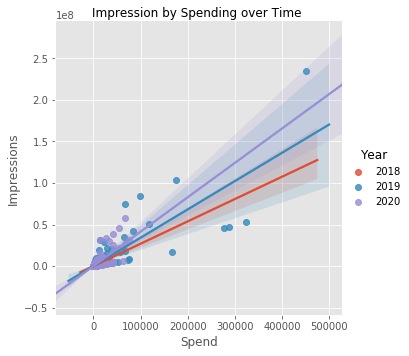

In [15]:
lm = sns.lmplot(x='Spend',y='Impressions',hue='Year',data=ads,fit_reg=True)
fig = lm.fig
fig.suptitle('Impression by Spending over Time')

In [16]:
file_df = ads.pivot_table(values=['Impressions', 'Spend'], columns=['FileType'], aggfunc=np.mean)
file_df

FileType                1              2              3             4  \
Impressions  1.087641e+06  201808.123272  275035.333333  1.606761e+06   
Spend        3.045827e+03     479.588710     770.779221  3.223625e+03   

FileType                5  
Impressions  2.417930e+06  
Spend        2.103617e+03

## Interests

For the interest ads, we found the average spending for when the target of interest was either agnostic or not. We found that there is a much larger spending for ads that were agnostic, and this may be because of the fact that politicans target people in the middle as they are easily swayed.

In [17]:
ads.loc[ads['Interests'] != 'agnostic', 'Spend'].mean()
# ads.loc[ads['Interests'] != 'agnostic', 'Impressions'].mean()

1296.876728110599

In [18]:
ads.loc[ads['Interests'] == 'agnostic', 'Spend'].mean()
# ads.loc[ads['Interests'] == 'agnostic', 'Impressions'].mean()

2529.901352426412

### FileType

For the file type, we were able to identify which file type had the most spending and most impressions. We found that this was the the mp4 file type. This makes sense as most ads on snapchat are in the form of short videos.

In [19]:
ads.loc[ads['Spend'] == max(ads['Spend']), 'FileType']
ads.loc[ads['Impressions'] == max(ads['Impressions']), 'FileType']

2200    1
Name: FileType, dtype: int64

Text(0.5, 0, 'FileType')

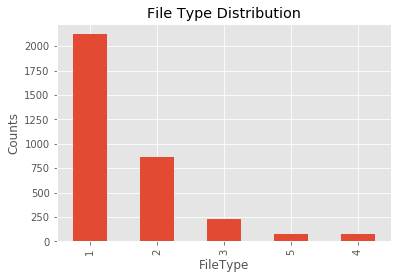

In [20]:
ax = ads['FileType'].value_counts().plot(kind='bar', title = 'File Type Distribution')
ax.set_ylabel('Counts')
ax.set_xlabel('FileType')

### Duration

Below is a plot of duration and spending of ads. We found that the most ads generally have the same amount of spending, but there are some outliers with duration between the 50 and 100 mark who have a larger amount of spending.

Text(0.5, 0.98, 'Spend vs Duration')

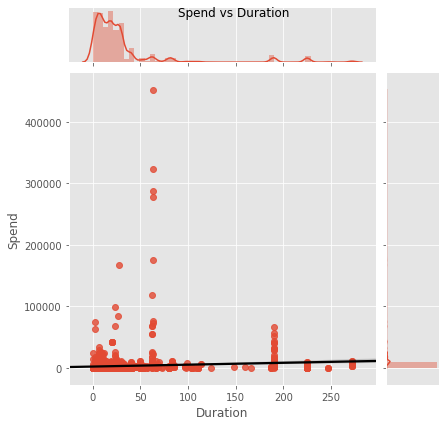

In [21]:
lm = sns.jointplot(x="Duration", y="Spend", data=ads, kind='reg',joint_kws={'line_kws':{'color':'black'}})
fig = lm.fig
fig.suptitle('Spend vs Duration')

Text(0, 0.5, 'Frequency')

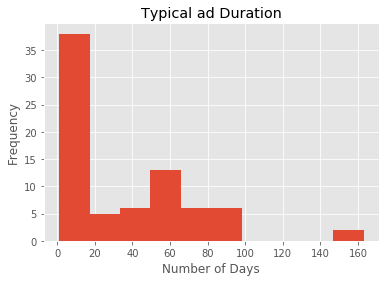

In [22]:
ax = ads['Duration'].value_counts().plot(kind = 'hist',title = 'Typical ad Duration')
ax.set_xlabel('Number of Days')
ax.set_ylabel('Frequency')


# Hypothesis Testing and Results 

In the below cells, we conducted various hypothesis tests to test the dependency of two variables.

### Impressions vs Spending


In this hypothesis test, our null hypothesis was that the spending is the same regardless of the number of impressions for the ad. The althernative hypothsis was that the spending would change with a larger reach for the ad. We used the test statistic of average spending and conducted the test for larger and smaller reach of the ad.

In [23]:
obsv_val = ads['Spend'].mean()
obsv_val

2213.442046126552

In [24]:
avg_imp = ads['Impressions'].mean()
avg_imp

848926.4127735068

In [25]:
small_imp = ads.loc[ads['Impressions'] <= avg_imp]
large_imp = ads.loc[ads['Impressions'] > avg_imp]

0.875


Text(0.5, 0, 'Spending')

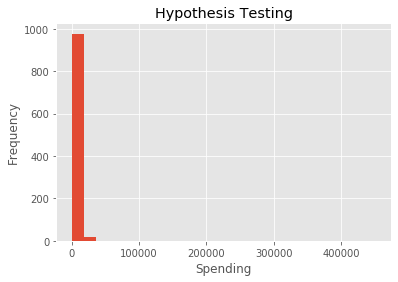

In [26]:
N = 1000
impress_vals = []
for i in range(N):
    sam_df = ads.sample(large_imp.shape[0])
    sam_df['Spend'] = np.random.choice(sam_df['Spend'])
    sam_mean = sam_df['Spend'].mean()
    impress_vals.append(sam_mean)
pval = np.count_nonzero(np.array(impress_vals) < obsv_val)/N
print(pval)

pd.Series(impress_vals, name='Average').plot(
    kind='hist', 
    bins=25,
    title = 'Hypothesis Testing'
).set_xlabel('Spending')

Here, the Pval is larger than the significance level, indicating that we would fail to reject the null hypothesis, meaning that there is evidence that points towards the fact that spending is the same regardless of the number of impressions of the ad.

0.865


Text(0.5, 0, 'Spending')

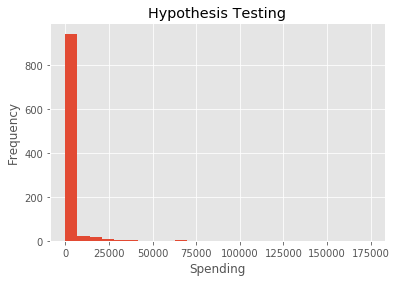

In [27]:
N = 1000
impress_vals = []
for i in range(N):
    sam_df = ads.sample(small_imp.shape[0])
    sam_df['Spend'] = np.random.choice(sam_df['Spend'])
    sam_mean = sam_df['Spend'].mean()
    impress_vals.append(sam_mean)
pval = np.count_nonzero(np.array(impress_vals) < obsv_val)/N
print(pval)

pd.Series(impress_vals, name='Average').plot(
    kind='hist', 
    bins=25,
    title = 'Hypothesis Testing'
).set_xlabel('Spending')

Here, the Pval is larger than the significance level, indicating that we would fail to reject the null hypothesis, meaning that there is evidence that points towards the fact that spending is the same regardless of the number of impressions of the ad.

### Impressions vs Duration

In this hypothesis test, our null hypothesis was that the duration of the ad is the same regardless of the number of impressions of the ad. The althernative hypothsis was that the durations of the ad change with different impressions. We used the test statistic of average durations and conducted the test for larger and shorter impressions

In [28]:
obsv_val = ads['Duration'].mean()
obsv_val

31.09220985691574

In [29]:
#small_dur = ads.loc[ads['Duration'] <= 30.0]
#large_dur = ads.loc[ads['Duration'] > 30.0]

In [30]:
avg_imp = ads['Impressions'].mean()
avg_imp

848926.4127735068

In [31]:
small_imp = ads.loc[ads['Impressions'] <= avg_imp]
large_imp = ads.loc[ads['Impressions'] > avg_imp]

0.616


Text(0.5, 0, 'Number of Days')

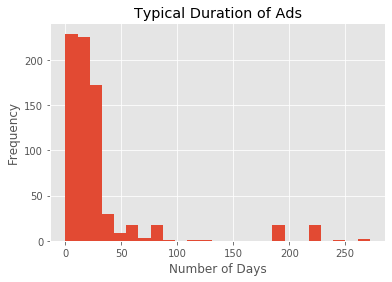

In [32]:
N = 1000
impress_vals = []
for i in range(N):
    sam_df = ads.sample(large_imp.shape[0])
    sam_df['Duration'] = np.random.choice(sam_df['Duration'])
    sam_mean = sam_df['Duration'].mean()
    impress_vals.append(sam_mean)
pval = np.count_nonzero(np.array(impress_vals) < obsv_val)/N
print(pval)

pd.Series(impress_vals, name='Average').plot(
    kind='hist', 
    bins=25,
    title = 'Typical Duration of Ads'
).set_xlabel('Number of Days')

Here, the Pval is larger than the significance level, indicating that we would fail to reject the null hypothesis, meaning that there is evidence that points towards the fact that duration is the same regardless of the fact the ad has a larger reach.

0.646


Text(0.5, 0, 'Number of Days')

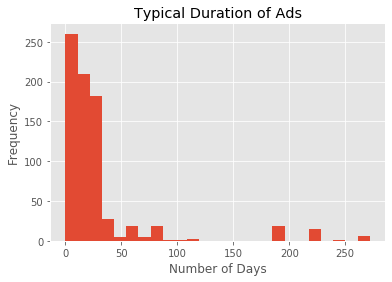

In [33]:
N = 1000
impress_vals = []
for i in range(N):
    sam_df = ads.sample(small_imp.shape[0])
    sam_df['Duration'] = np.random.choice(sam_df['Duration'])
    sam_mean = sam_df['Duration'].mean()
    impress_vals.append(sam_mean)
pval = np.count_nonzero(np.array(impress_vals) < obsv_val)/N
print(pval)

pd.Series(impress_vals, name='Average').plot(
    kind='hist', 
    bins=25,
    title = 'Typical Duration of Ads'
).set_xlabel('Number of Days')

Here, the Pval is larger than the significance level, indicating that we would fail to reject the null hypothesis, meaning that there is evidence that points towards the fact that duration is the same regardless of the fact the ad has a smaller reach.

### Impressions vs Gender Demographic

In this hypothesis test, our null hypothesis was that the impressions are the same regardless of the gender demographic of the ad. The althernative hypothsis was that the impressions change with different gender demographics. We used the test statistic of average impressions and conducted the test for female-targeted ads.

#### Female

In [34]:
sig_level1 = 0.05
obvs1 = ads['Impressions'].mean()
size1 = ads.loc[ads['Gender']=='FEMALE'].shape[0]

In [35]:
N_trials = 1000
averages1 = []

for i in np.arange(N_trials): 
    ran_samp1 = ads.sample(size1, replace=True)
    new_average1 = ran_samp1.groupby('Gender')['Impressions'].mean().iloc[1]
#     new_average1
    averages1.append(new_average1)
averages1 = np.array(averages1)

In [36]:
pval = np.count_nonzero(averages1 >= obvs1) / N_trials
pval

0.033

In [37]:
pval > sig_level1

False

Text(0.5, 0, 'Average Impressions')

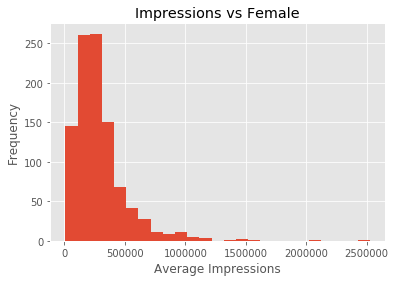

In [38]:
pd.Series(averages1, name='Average').plot(
    kind='hist', 
    bins=25,
    title = 'Impressions vs Female'
).set_xlabel('Average Impressions')

Here, the Pval is smaller than the significance level, indicating that we would reject the null hypothesis, meaning that there is evidence that points towards the fact that impressions are different for different gender - targeted ads. 

# Data Visualizations

## Correlation Map

For this correlation map, we narrowed down our selected columns to a very small portion to the dataset in order to directly compare these results to one another. These were the columns that we deemed would most likely show some correlation to one another and would just provide a different visual for us to display some new results. 

In [39]:
new_df = ads[['Spend','Impressions','Duration', 'FileType','Year']]
new_df = new_df.dropna(axis = 0).reset_index()

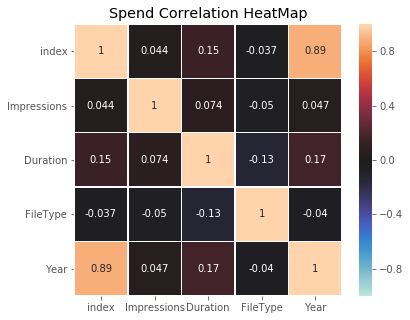

In [40]:
features = new_df.loc[:,new_df.columns != 'Spend']
targets = new_df.loc[:,new_df.columns == 'Spend']

#creating pairwise correlation of columns using Pearson's R,
corr = features.corr(method='pearson') 

#plotting the correlation coefficients on a seasborn heatmap matrix
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, annot=True, xticklabels=corr.columns, 
            yticklabels=corr.columns, ax=ax, linewidths=.5, 
            vmin = -1, vmax=1, center=0)

plt.title('Spend Correlation HeatMap')
plt.show()

## Prediction Modeling

Here, we created a predictive model using Linear regression to predict the spending for the ads. We used the columns of index, Impressions, Duration, FileType, and Year to predict the pending of the ads.

In [41]:
#importing our function for splitting the data and an additional cross validation function,
from sklearn.model_selection import train_test_split, cross_val_score

#splitting our dataset randomly with the test data containing 10% of the data,
X_train, X_test, y_train, y_test = train_test_split(features,targets, 
                                                    test_size=0.1, 
                                                    random_state=42)

#view number of training and testing data
print('Our training prediction variable contains :',len(y_train) ,'rows')
print('Our training independent variable contains :',len(X_train) ,'rows')
print('Our testing prediction variable contains :',len(y_test) ,'rows')
print('Our testing independent variable contains :',len(X_test) ,'rows')

Our training prediction variable contains : 2264 rows
Our training independent variable contains : 2264 rows
Our testing prediction variable contains : 252 rows
Our testing independent variable contains : 252 rows


In [42]:
import sklearn.metrics
from sklearn.linear_model import LinearRegression

#Instantiate the regression model and setting parameters if any,
reg_model = LinearRegression()

In [43]:
reg_model.fit(X_train, y_train)

#outputs the coefficients
print('Intercept :', reg_model.intercept_[0], '\n')
print(pd.DataFrame({'features':X_train.columns,'coeficients':reg_model.coef_[0]}))

Intercept : -2787608.4266963825 

      features  coeficients
0        index    -1.059956
1  Impressions     0.002143
2     Duration     7.698580
3     FileType  -509.336105
4         Year  1382.118127


In [44]:
X_train.columns

Index(['index', 'Impressions', 'Duration', 'FileType', 'Year'], dtype='object')

Sample predictions are:
 [1825.36637165 2198.45834454  241.27722113 1246.98840227  448.94985365]


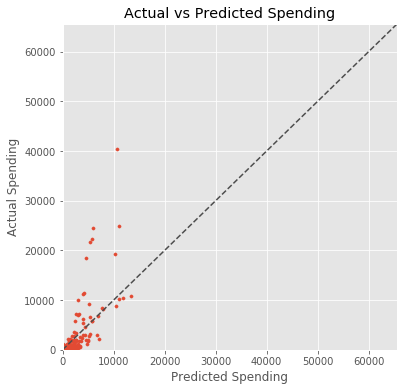

In [45]:
y_pred = reg_model.predict(X_test)

#printing sample of predictions
print('Sample predictions are:\n', y_pred[:5].flatten())

y_pred_a = pd.DataFrame(y_pred)
y_test_a = y_test.reset_index(drop=True, inplace=False)
pred_act_df = pd.concat([y_test_a,y_pred_a], axis=1).sort_values(1,axis=1).reset_index(drop=True)
#output samples of our predicted values
plt.figure(figsize=(6, 6))
maxlimit = pred_act_df['Spend'].max()
plt.xlim(-1, maxlimit)
plt.ylim(-1, maxlimit)
plt.scatter(pred_act_df[0], pred_act_df['Spend'], s=10)
plt.xlabel('Predicted Spending')
plt.ylabel('Actual Spending')
plt.plot([-1,maxlimit], [-1,maxlimit], ls="--", c=".3")
plt.title('Actual vs Predicted Spending')
plt.show()
# y_pred

In [46]:
from sklearn.metrics import mean_squared_error

y_pred_test = reg_model.predict(X_test)
y_pred_train = reg_model.predict(X_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print("Root Mean Squared Error of Training Set: {}".format(rmse_train))
print("Root Mean Squared Error of Testing Set: {}".format(rmse_test))

Root Mean Squared Error of Training Set: 8732.758458948992
Root Mean Squared Error of Testing Set: 3392.256199516595


## State Analysis

Here, we created a map visualization to demonstrate the state with the most targeted ads. To do this, we mapped the state abbreviations to the state and computed the value counts of each state and determined the one that appeared the most.

In [47]:
us_state_abbrev = {
    'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO',
    'Connecticut': 'CT','Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS','Kentucky': 'KY',
    'Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN',
    'Mississippi': 'MS','Missouri': 'MO','Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND',
    'Northern Mariana Islands':'MP', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Palau': 'PW', 'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',  'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',  
    'Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virgin Islands': 'VI','Virginia': 'VA','Washington': 'WA',
    'West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY',
}

US_states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

In [48]:
states = []
for i in ads['Regions (Included)']:
    if type(i) == str:
        states.append(i)

In [49]:
states = [i.split(',') for i in states]
states = [i for x in states for i in x]
states = [i for i in states if i in US_states]

In [50]:
df = pd.Series(states).value_counts().rename_axis('State').reset_index(name = 'Count')
df['Code'] = df['State'].map(us_state_abbrev)

In [51]:
df.head()

State  Count Code
0  Minnesota    398   MN
1   Virginia    186   VA
2      Texas    183   TX
3   Colorado    183   CO
4    Florida    154   FL

In [52]:
fig = go.Figure(data=go.Choropleth(
    locations=df['Code'], # Spatial coordinates
    z = df['Count'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Region",
))

fig.update_layout(
    title_text = 'Snapchat Target by State',
    geo_scope='usa', # limite map scope to USA
)

## Ethics & Privacy
In terms of our data, no efforts were needed in terms of collecting the data intended to be used for the project. The data is readily available and posted by Snapchat and thus we can assume that the data collected has the consent of Snapchats users. No personal account information or any other forms of identification is present in our dataset. For the purposes of our project, we will be focusing on data that is specifically in the United States. We decided to focus our attention to the United States on the basis of familiarity of the US political system amongst our group members.

Our data will be available to all those who have access to our COGS 108 project repository on GitHub which would include project members, the professor and TAs. Although the data itself is publicly available, any additional changes and findings from our dataset will be stored on the repository to minimize unwarranted observations. 


## Conclusion & Discussion 

With the completion of the technical and analytical portions of our project, we can now discuss our end results of our project. Based on our hypothesis, we aimed to solved two specific questions: advertisements with larger impressions or reaches would generally be more expensive to create and that advertisements of smaller impressions would require less resources such as cost. From our analysis, we have to argue that both of our hypotheses were wrong. We found that larger reaches does not automatically mean larger spends and larger consumption of resources and vice versa for smaller reach advertisments.

This was shown through the hypothesis testing performed as part of our analysis. We conducted the hypothesis tests for smaller and larger impressions against spending, and smaller and larger impressions against durations, and impressios against demoraphic. In the case of spending and durations, we had to reject our hypotheses, indicating that there is no correlation between number of views and spending, and number of views and duration of the ad. For demographic, we accepted our hypothsis and we were able to conclude that impressions are different for different gender - targeted ads. Overall, were able to conclude that ads with large reaches dont necessarily have more spending or longer duration, and the same can be said with the smaller reach ads. However, ads that target a specifc gender do get more of a reach than ads that do not.

Our ability to perform such calculations and determine the outcome of our hypotheses would not have been possible without the extensive cleaning we performed during the early phases of the project. Specific cases included organizing the regional data in regards to the states found in the US to perform our analysis of spend data within the United States. Other areas of cleaning included having to impute the rather significant portion of null values found in our data to be gain a better understanding of possible trends as well as resetting and re-determining data types of some of our columns. These changes allowed for a better execution from within the analysis portion of the project and helped mitigate future problems especially with preventing incompatible operations due to datatypes.

Some of the limitations of the project included the messiness of the datasets we used. We saw examples of this through columns such as Age the bracket were the ages weren't standardized and it made it unrealistic to use that data to come up with a valid conclusion as a result. Another limitation included the limited use of the full dataset since we were only focusing on US political data, but the dataset included information from other countries. Other limitations included scheduling during the last few weeks of the quarter due to the coronavirus.

When we think of the social impacts that our project could bring light to, we immediately point towards the current political environment within the United States and possibly even a couple of years before. In comparison to recent years, the political landscape has become one of increased ferver and susceptiblity of false information from the increased influence of not only prominent individuals, but from social media as well. What this Snapchat database shows us is the movement of traditional political advertisments from your standard cable channels to an avenue that has the potential to reach millions of more voters, individuals and citizens to agree with a political talking point, both positive and negative. This project is not aimed at pointing the rational of the advertisements being deployed to the users of Snapchat, but rather show how political strategy could and will get increasingly more dependent on mediums such as Snapchat to reach out to citiznes. This strategy can be applied to all political parties in the country and prove valuable to political pundits by maximizing resources for campaign efforts and also to the average citizen who would be able to identify why they might be targeted more for certain types of ads than others

## Team Contributions

We all worked together to formulate our research question and our hypothesis, find and describe our dataset, and learn about the background info we needed in order to do our project. Listed below is what we did in pairs:

Austin Le and Justin Kang: Worked on the Data Cleaning and the Data Visualizations 

Sravya Voleti and Zahra Masood: Worked on the Hypothesis Testing and the Predictive Modelling

After doing the things listed above in pairs, we again worked together in order to analyze our results and put together our project by discussing each part of what we did in our Data Analysis and writing up a conclusion based on our results.